# SEXUAL HARASSMENT PERSONAL STORIES CLASSIFICATION

## Problem Statement:

Given a Personal story, have to analyze and categorize various forms of Sexual Harassment.

## Data Overview:

In recent ages , an increasing number of Personal Stories about Sexual Harassement and sexual abuse have been shared online. It is tedious to categorize the various forms of sexual harassement based on the stories, because large manual power will be required. But with the help of Machine learning it is quite easy and faster actions can be taken.This data is provided by an Online Forum SafeCity. So here the main task is to classify the various forms of sexual harassement based on the stories.There are various forms of sexual harassement but in this dataset only top three categorizes such as Commenting, Ogling/Facial Expressions/Staring and Touching/Groping are considered.



**Single-Label Binary Classification:**

The data for single-label classification is given in two columns, with the first column 
being the description of the incident and the second column being 1 if the 
category of sexual harassment is present and 0 if it is not.For each 
category, there are 7201 training samples, 990 development samples, and 
1701 test samples.




**-Example for Binary Classification Dataset:**

Description | Groping
----------|---------------
**Was walking along crowded street, holding mums hand, when an elderly man groped butt, I turned to look at him and he looked away, and did it again after a while.I was 12 yrs old then. | 1 
**This incident took place in the evening.I was in the metro when two guys started staring. | 0
**Catcalls and passing comments were two of the ghastly things the Delhi police at the International Airport put me and my friend through. It is appalling that the protectors and law enforcers at the airport can make someone so uncomfortable. | 0




**-% Percentage Positive Split in the Binary Classification Dataset:**

Category | % Positive
----------|---------------
Commenting | 39.3%
Ogling | 21.4%
Groping | 30.1%




**Multi-Label Classification:**

The data for multi-label classification is given in four 
columns, with the first column being the description of the incident and 
the second, third, and fourth column being 1 if the category of sexual 
harassment is present and 0 if it is not.There are 7201 training samples, 
990 development samples, and 1701 test samples.




**-Example for Multi-Label Classification Dataset:**

Description | Commenting | Ogling | Groping
----------|---------------|----------|---------------
**Was walking along crowded street, holding mums hand, when an elderly man groped butt, I turned to look at h7m and he looked away, and did it again after a while.I was 12 yrs old then. |	0 |	0 |	1
**This incident took place in the evening.I was in the metro when two guys started staring. | 0 | 1 | 0
**Catcalls and passing comments were two of the ghastly things the Delhi police at the International Airport put me and my friend through. It is appalling that the protectors and law enforcers at the airport can make someone so uncomfortable. | 1 | 1 | 0



**-Number of Examples in Multi-Label Classification:**

Commenting | Ogling | Groping | Examples in Dataset
----------|---------------|----------|---------------
1 | 1 | 1 | 351
1 | 1 | 0 | 819
1 | 0 | 1 | 459
0 | 1 | 1 | 201
1 | 0 | 0 | 2256
0 | 0 | 1 | 1966
0 | 1 | 0 | 743
0 | 0 | 0 | 3097



## Business Objective and Constraints:

There is not much requirement for faster results similar to Search Engine(Eg:Google) but little lower than that like within few mins.

## Performance Metrics:

This CaseStudy is based on ResearchPaper: https://arxiv.org/pdf/1809.04739.pdf

**Single-Label Binary Classification:**

**-->Accuracy**

**-->F1-Score**

**Multi-Label Classification:**

**-->Hamming Loss**

**-->Micro F1-Score**

**-->Accuracy**



In [81]:
#Importing Librarires
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

import seaborn as sns
import nltk
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from nltk.stem.porter import PorterStemmer
import re
import string
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer

import pickle
from tqdm import tqdm
import os
%matplotlib inline

## Single Label Binary Classification:

In [82]:
commenting_df=pd.read_csv('commenting_data_train.csv')#Loading commenting_data_train in to pandas DataFrame

In [83]:
commenting_df.head()

,Description,Category
0,"Was walking along crowded street, holding mums...",0
1,This incident took place in the evening.I was ...,0
2,I WAS WAITING FOR THE BUS. A MAN CAME ON A BIK...,1
3,Incident happened inside the train,0
4,I witnessed an incident when a chain was bruta...,0


In [84]:
groping_df=pd.read_csv('groping_data_train.csv')#Loading groping_data_train.csv in to pandas DataFrame

In [85]:
groping_df.head()

,Description,Category
0,"Was walking along crowded street, holding mums...",1
1,This incident took place in the evening.I was ...,0
2,I WAS WAITING FOR THE BUS. A MAN CAME ON A BIK...,0
3,Incident happened inside the train,0
4,I witnessed an incident when a chain was bruta...,0


In [86]:
ogling_df=pd.read_csv('ogling_data_train.csv')#Loading groping_data_train.csv in to pandas DataFrame

In [87]:
ogling_df.head()

,Description,Category
0,"Was walking along crowded street, holding mums...",0
1,This incident took place in the evening.I was ...,1
2,I WAS WAITING FOR THE BUS. A MAN CAME ON A BIK...,0
3,Incident happened inside the train,0
4,I witnessed an incident when a chain was bruta...,0


In [88]:
print("No of Datapoints in Commenting Train Data:")#Shape of the train dataset
print(commenting_df.shape)
print('-'*125)
print("No of Datapoints in Groping Train Data:")#Shape of the train dataset
print(groping_df.shape)
print('-'*125)
print("No of Datapoints in Ogling Train Data:")#Shape of the train dataset
print(ogling_df.shape)

No of Datapoints in Commenting Train Data:
(7201, 2)
-----------------------------------------------------------------------------------------------------------------------------
No of Datapoints in Groping Train Data:
(7201, 2)
-----------------------------------------------------------------------------------------------------------------------------
No of Datapoints in Ogling Train Data:
(7201, 2)


In [89]:
commenting_df.isnull().sum()#checking for null values but no such empty data points

Description    0
Category       0
dtype: int64

In [90]:
groping_df.isnull().sum()#checking for null values but no such empty data points

Description    0
Category       0
dtype: int64

In [91]:
ogling_df.isnull().sum()#checking for null values but no such empty data points

Description    0
Category       0
dtype: int64

## Exploratory Data Analysis

### Univariate Analysis:

### Category

In [92]:
commenting_count=commenting_df['Category'].value_counts()#counting number of occurances in each of the classes
groping_count=groping_df['Category'].value_counts()#counting number of occurances in each of the classes
ogling_count=ogling_df['Category'].value_counts()#counting number of occurances in each of the classes

In [93]:
print('Percentage of Positive points in Commenting Train data: %',commenting_count[1]/commenting_df.shape[0])
print('Percentage of Negative points in Commenting Train data: %',commenting_count[0]/commenting_df.shape[0])
print('-'*125)
print('Percentage of Positive points in Groping Train data: %',groping_count[1]/groping_df.shape[0])
print('Percentage of Negative points in Groping Train data: %',groping_count[0]/groping_df.shape[0])
print('-'*125)
print('Percentage of Positive points in Ogling Train data: %',ogling_count[1]/ogling_df.shape[0])
print('Percentage of Negative points in Ogling Train data: %',ogling_count[0]/ogling_df.shape[0])

Percentage of Positive points in Commenting Train data: % 0.39161227607276766
Percentage of Negative points in Commenting Train data: % 0.6083877239272323
-----------------------------------------------------------------------------------------------------------------------------
Percentage of Positive points in Groping Train data: % 0.3007915567282322
Percentage of Negative points in Groping Train data: % 0.6992084432717678
-----------------------------------------------------------------------------------------------------------------------------
Percentage of Positive points in Ogling Train data: % 0.21191501180391611
Percentage of Negative points in Ogling Train data: % 0.7880849881960839


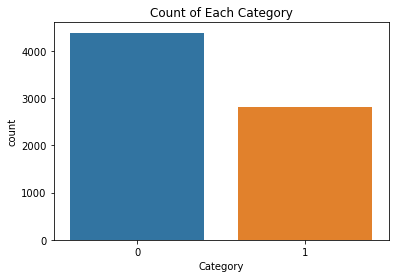

In [94]:
#Commenting Data
plt.title('Count of Each Category')
sns.countplot(x='Category',data=commenting_df)#count plot of Category
plt.show()

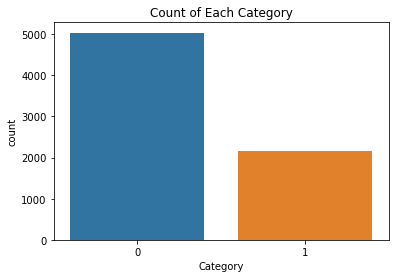

In [95]:
#Groping Data
plt.title('Count of Each Category')
sns.countplot(x='Category',data=groping_df)#count plot of Category
plt.show()

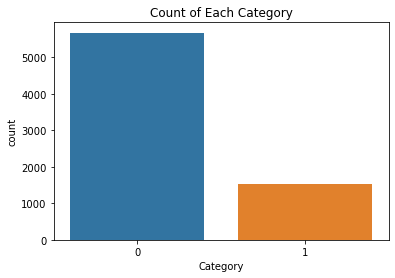

In [96]:
#Ogling Data
plt.title('Count of Each Category')
sns.countplot(x='Category',data=ogling_df)#count plot of Category
plt.show()

**Observation:**

This countplot on Category says that how the data is distributed.

In commenting data,

Percentage of Positive points in Commenting Train data: % 0.39161227607276766.

Percentage of Negative points in Commenting Train data: % 0.6083877239272323.

In groping data,

Percentage of Positive points in Groping Train data: % 0.3007915567282322.

Percentage of Negative points in Groping Train data: % 0.6992084432717678.

In ogling data,

Percentage of Positive points in Ogling Train data: % 0.21191501180391611.

Percentage of Negative points in Ogling Train data: % 0.7880849881960839.

Among these three the commenting data is lightly balanced compared to remaining two, but in case of groping data and ogling data they are highly imbalanced where in the dataset more number of negative points compared to positive points and some kind of balancing techniques have to be done.

## Description

### Univariate Analysis:

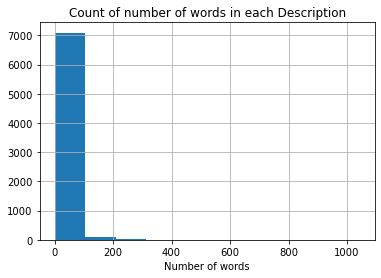

In [97]:
commenting_df['Description'].str.split().apply(len).hist()#creating a histogram plot of count of words in the whole text data.
plt.title('Count of number of words in each Description')
plt.xlabel('Number of words')
plt.show()

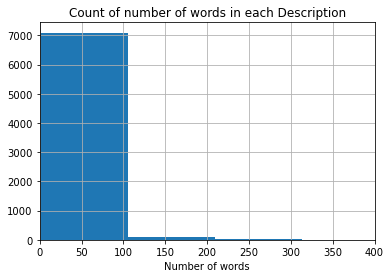

In [98]:
#limiting X-axis range from 0 to 400
plt.xlim([0,400])#limiting the range of X-axis
commenting_df['Description'].str.split().apply(len).hist()#creating a histogram plot of count of words in the whole text data.
plt.title('Count of number of words in each Description')
plt.xlabel('Number of words')
plt.show()

**Observation:**

From this plot we can see that number of words ranges from 0 to 320(approximately)  very few descriptions range more than 100
and most commonly the number of words range from 0 to 110(approximately). 
The Personal Stories written by most people occur between this range.

C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


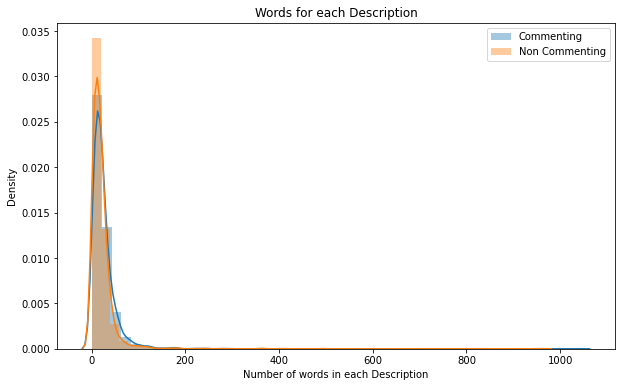

In [99]:
word_count_0 = commenting_df[commenting_df['Category']==0]['Description'].str.split().apply(len).values#considering only negative labels.
word_count_1 = commenting_df[commenting_df['Category']==1]['Description'].str.split().apply(len).values#considering only positive labels.
plt.figure(figsize=(10,6))
sns.distplot(word_count_0,label='Commenting')
sns.distplot(word_count_1,label='Non Commenting')
plt.title('Words for each Description')
plt.xlabel('Number of words in each Description')
plt.legend()
plt.show()

C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


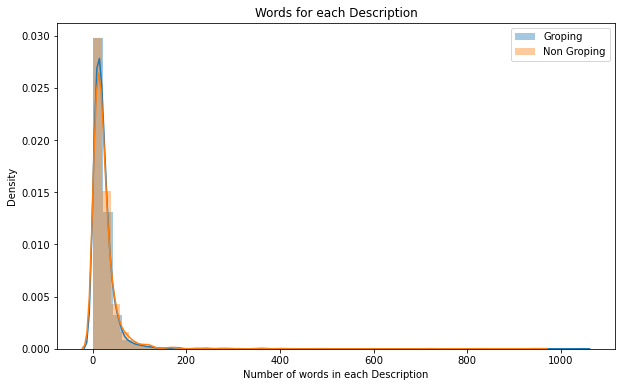

In [100]:
word_count_0 = groping_df[groping_df['Category']==0]['Description'].str.split().apply(len).values#considering only negative labels.
word_count_1 = groping_df[groping_df['Category']==1]['Description'].str.split().apply(len).values#considering only positive labels. 
plt.figure(figsize=(10,6))
sns.distplot(word_count_0,label='Groping')
sns.distplot(word_count_1,label='Non Groping')
plt.title('Words for each Description')
plt.xlabel('Number of words in each Description')
plt.legend()
plt.show()

C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


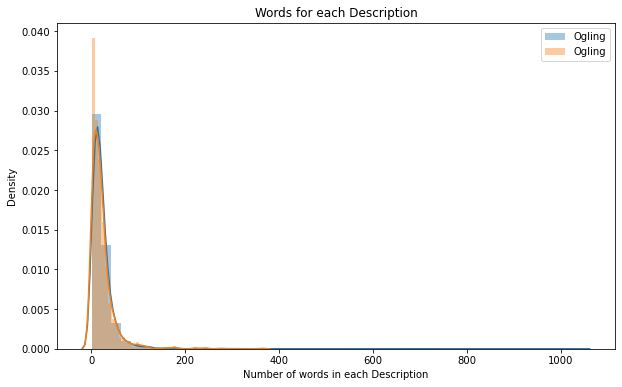

In [101]:
word_count_0 = ogling_df[ogling_df['Category']==0]['Description'].str.split().apply(len).values#considering only negative labels.
word_count_1 = ogling_df[ogling_df['Category']==1]['Description'].str.split().apply(len).values#considering only positive labels.
plt.figure(figsize=(10,6))
sns.distplot(word_count_0,label='Ogling')
sns.distplot(word_count_1,label='Ogling')
plt.title('Words for each Description')
plt.xlabel('Number of words in each Description')
plt.legend()
plt.show()

**Observation:**
    
Creating Distribution plot for Number of words in each Description for each Category and after visualizing it
for commenting data, groping data and ogling data moreover they seems to be similar for each category.The distribution of the number of words in each Description are moreover log-normally Distributed. The distribution for both category are overlapping with each other.

In [102]:
vect=CountVectorizer()#in the presence of stop words
output=vect.fit_transform(commenting_df['Description'])
features=vect.get_feature_names()#here we are getting the unique feature names

#https://stackoverflow.com/questions/27488446/how-do-i-get-word-frequency-in-a-corpus-using-scikit-learn-countvectorizer
count=output.toarray().sum(axis=0)#here we are getting the count of unique words

df=pd.DataFrame(count,features)#Loading the feature and count to the DataFrame
df=df.sort_values(by=0,ascending=False)#Sorting the DataFrame to get the most occurances
df=df[:40]#Top 40 words with most word count
df

,0
and,6448
the,5964
was,5376
to,4866
in,3556
my,3428
me,3299
of,2501
on,2169
at,1977


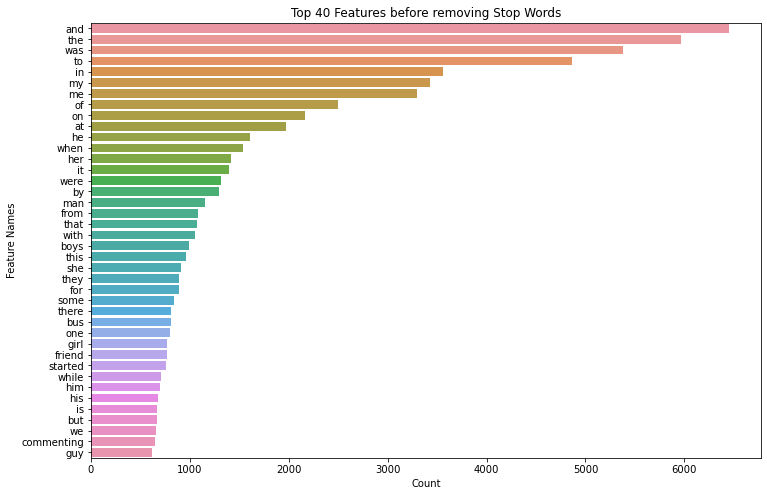

In [103]:
x=df.index#getting only the top 40 feature names
y=[df[0][i] for i in range(len(df))]#getting the count of top 40 feature names
plt.figure(figsize=(12,8))
sns.barplot(x=y,y=x)
plt.title('Top 40 Features before removing Stop Words')
plt.xlabel('Count')
plt.ylabel('Feature Names')
plt.show()

In [104]:
vect=CountVectorizer(stop_words=set(stopwords.words('english')))#in the presence of stop words
output=vect.fit_transform(commenting_df['Description'])
features=vect.get_feature_names()#here we are getting the unique feature names
count=output.toarray().sum(axis=0)#here we are getting the count of unique words
df=pd.DataFrame(count,features)#Loading the feature and count to the DataFrame
df=df.sort_values(by=0,ascending=False)#Sorting the DataFrame to get the most occurances
df=df[:40]#Top 40 words with most word count
df

,0
man,1156
boys,991
bus,807
one,798
girl,771
friend,769
started,761
commenting,651
guy,618
happened,589


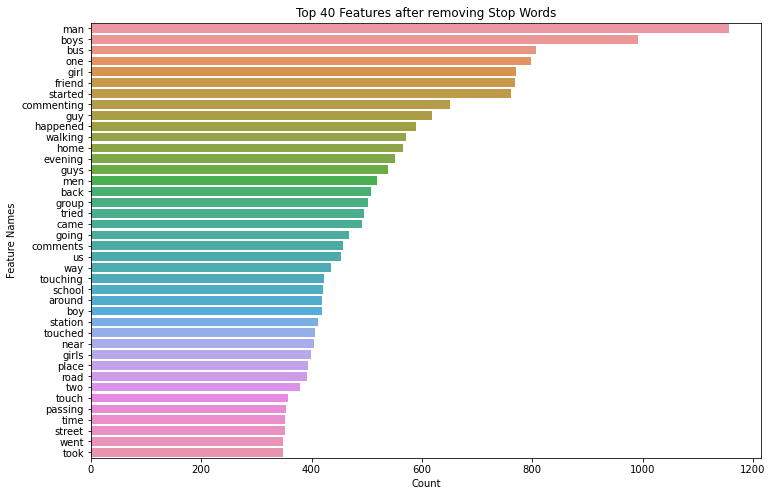

In [105]:
x=df.index
y=[df[0][i] for i in range(len(df))]
plt.figure(figsize=(12,8))
sns.barplot(x=y,y=x)
plt.title('Top 40 Features after removing Stop Words')
plt.xlabel('Count')
plt.ylabel('Feature Names')
plt.show()

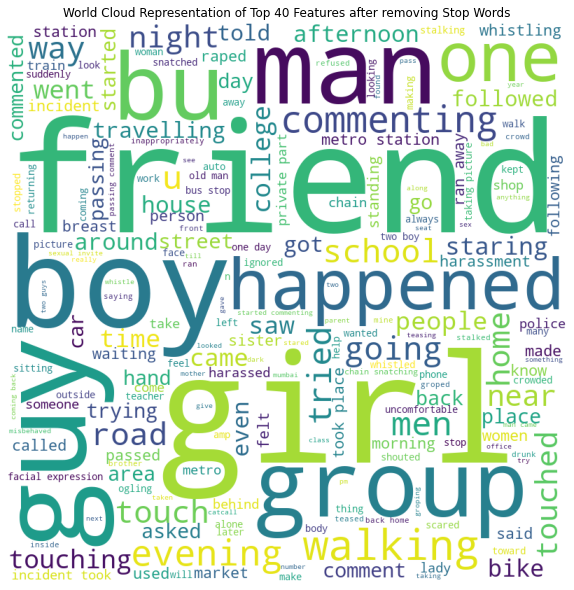

In [106]:
#https://www.geeksforgeeks.org/generating-word-cloud-python/

# Python program to generate WordCloud 
  
# importing all necessery modules 

import matplotlib.pyplot as plt 
import pandas as pd 
from wordcloud import WordCloud, STOPWORDS 

comment_words = '' 
stopwords = set(STOPWORDS) 
  
# iterate through the csv file 
for val in commenting_df['Description']: 
      
    # typecaste each val to string 
    val = str(val) 
  
    # split the value 
    tokens = val.split() 
      
    # Converts each token into lowercase 
    for i in range(len(tokens)): 
        tokens[i] = tokens[i].lower() 
      
    comment_words += " ".join(tokens)+" "
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = stopwords, 
                min_font_size = 10).generate(comment_words) 
  
# plot the WordCloud image         

plt.figure(figsize = (8, 8), facecolor = None) 
plt.title('World Cloud Representation of Top 40 Features after removing Stop Words')
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show()

**Observation:**

By using the Count Vectorizer, we are getting the Top 40 Features that occur more frequently in the Description.
First before removing stop words we could see that more number of stopwords repeated in the whole corpus.
But after removing stop words and analysing it using barplot and Word Cloud Representation we could see that man,boys,bus,one, girl,friend,started,commenting,guy,happened,walking,home etc these are the most frequent words occuring in this whole corpus.
Since it is Personal Stories about Sexual Harassment written by various people through online these Top 40 Features represent that these are features people used frequently while writing the personal stories.

In [107]:
commenting=commenting_df[commenting_df['Category']==0]['Description']
non_commenting=commenting_df[commenting_df['Category']==1]['Description']

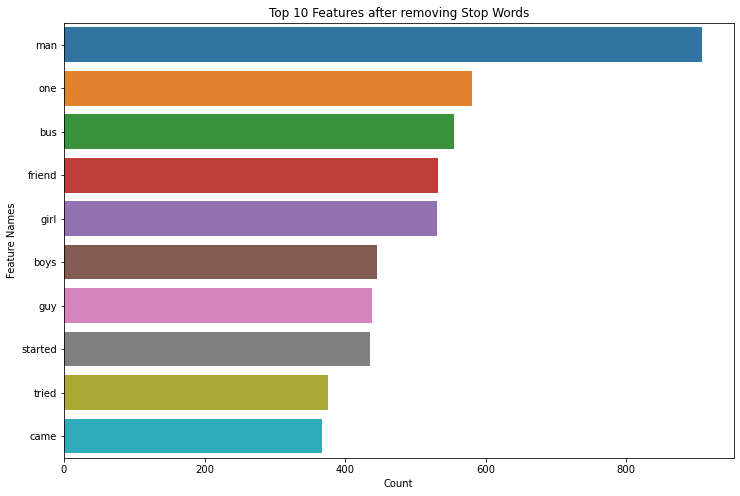

In [108]:
#commenting
from nltk.corpus import stopwords
vect=CountVectorizer(stop_words=set(stopwords.words('english')))#in the presence of stop words
output=vect.fit_transform(commenting)
features=vect.get_feature_names()#here we are getting the unique feature names
count=output.toarray().sum(axis=0)#here we are getting the count of unique words
df=pd.DataFrame(count,features)#Loading the feature and count to the DataFrame
df=df.sort_values(by=0,ascending=False)#Sorting the DataFrame to get the most occurances
df=df[:10]#Top 40 words with most word count

x=df.index#getting only the top 40 feature names
y=[df[0][i] for i in range(len(df))]#getting the count of top 40 feature names
plt.figure(figsize=(12,8))
sns.barplot(x=y,y=x)
plt.title('Top 10 Features after removing Stop Words')
plt.xlabel('Count')
plt.ylabel('Feature Names')
plt.show()

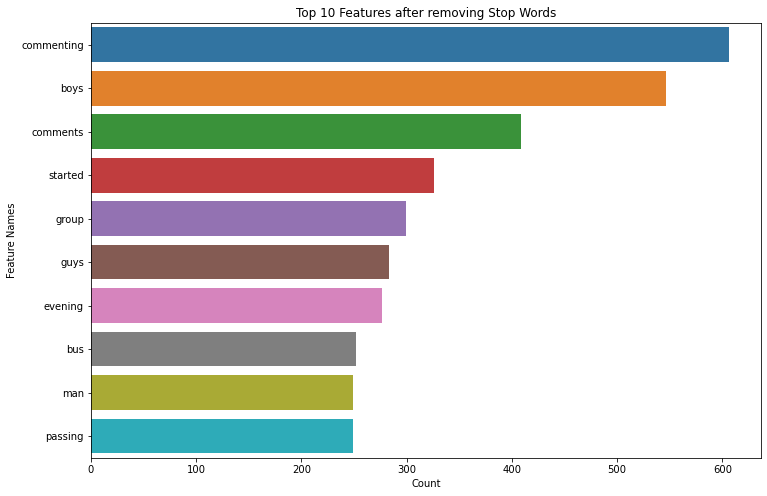

In [109]:
#non_commenting
vect=CountVectorizer(stop_words=set(stopwords.words('english')))#in the presence of stop words
output=vect.fit_transform(non_commenting)
features=vect.get_feature_names()#here we are getting the unique feature names
count=output.toarray().sum(axis=0)#here we are getting the count of unique words
df=pd.DataFrame(count,features)#Loading the feature and count to the DataFrame
df=df.sort_values(by=0,ascending=False)#Sorting the DataFrame to get the most occurances
df=df[:10]#Top 40 words with most word count

x=df.index#getting only the top 40 feature names
y=[df[0][i] for i in range(len(df))]#getting the count of top 40 feature names
plt.figure(figsize=(12,8))
sns.barplot(x=y,y=x)
plt.title('Top 10 Features after removing Stop Words')
plt.xlabel('Count')
plt.ylabel('Feature Names')
plt.show()

In [110]:
groping=groping_df[groping_df['Category']==0]['Description']
non_groping=groping_df[groping_df['Category']==1]['Description']

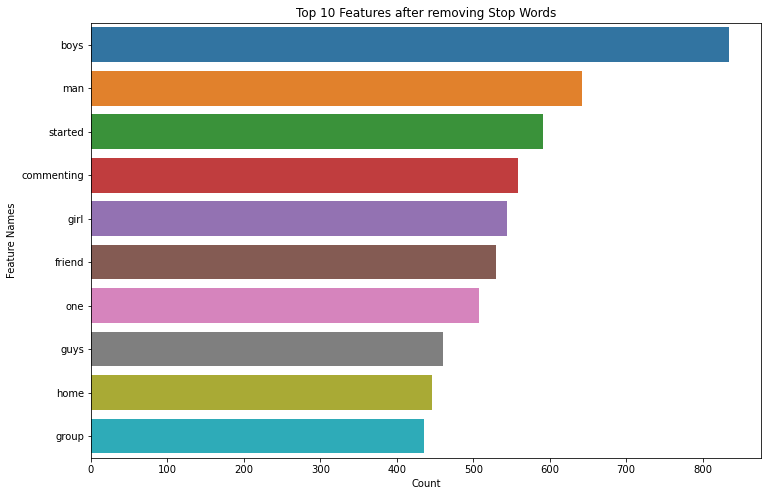

In [111]:
#groping
vect=CountVectorizer(stop_words=set(stopwords.words('english')))#in the presence of stop words
output=vect.fit_transform(groping)
features=vect.get_feature_names()#here we are getting the unique feature names
count=output.toarray().sum(axis=0)#here we are getting the count of unique words
df=pd.DataFrame(count,features)#Loading the feature and count to the DataFrame
df=df.sort_values(by=0,ascending=False)#Sorting the DataFrame to get the most occurances
df=df[:10]#Top 40 words with most word count

x=df.index#getting only the top 40 feature names
y=[df[0][i] for i in range(len(df))]#getting the count of top 40 feature names
plt.figure(figsize=(12,8))
sns.barplot(x=y,y=x)
plt.title('Top 10 Features after removing Stop Words')
plt.xlabel('Count')
plt.ylabel('Feature Names')
plt.show()

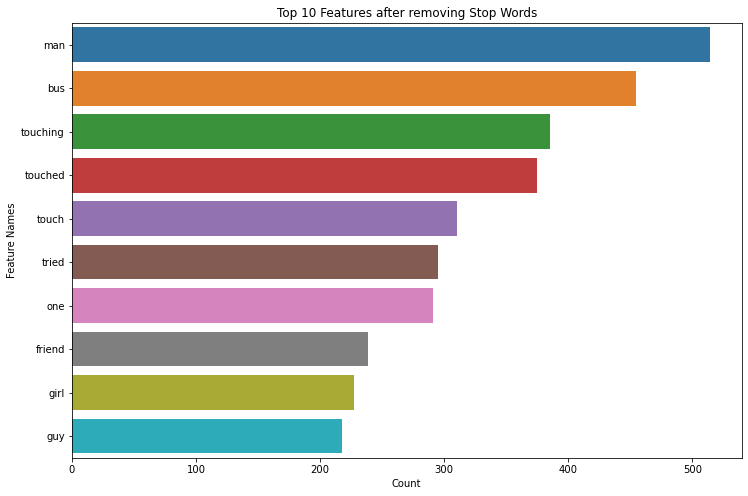

In [112]:
#non_groping
vect=CountVectorizer(stop_words=set(stopwords.words('english')))#in the presence of stop words
output=vect.fit_transform(non_groping)
features=vect.get_feature_names()#here we are getting the unique feature names
count=output.toarray().sum(axis=0)#here we are getting the count of unique words
df=pd.DataFrame(count,features)#Loading the feature and count to the DataFrame
df=df.sort_values(by=0,ascending=False)#Sorting the DataFrame to get the most occurances
df=df[:10]#Top 40 words with most word count

x=df.index#getting only the top 40 feature names
y=[df[0][i] for i in range(len(df))]#getting the count of top 40 feature names
plt.figure(figsize=(12,8))
sns.barplot(x=y,y=x)
plt.title('Top 10 Features after removing Stop Words')
plt.xlabel('Count')
plt.ylabel('Feature Names')
plt.show()

In [113]:
ogling=ogling_df[ogling_df['Category']==0]['Description']
non_ogling=ogling_df[ogling_df['Category']==1]['Description']

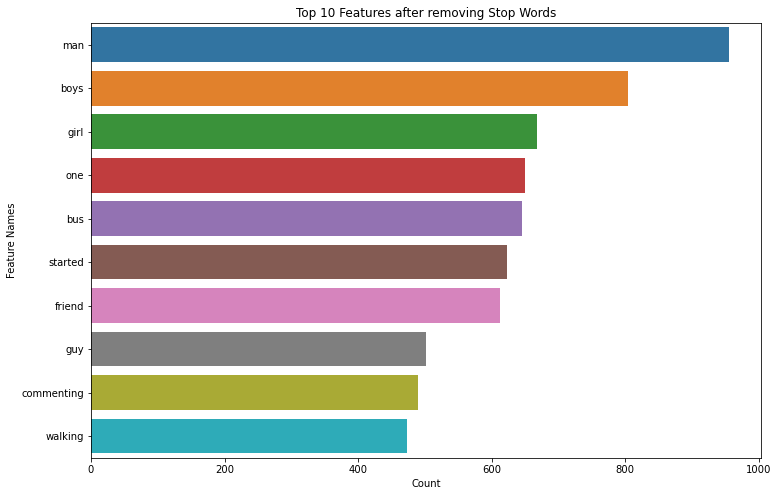

In [114]:
#ogling
vect=CountVectorizer(stop_words=set(stopwords.words('english')))#in the presence of stop words
output=vect.fit_transform(ogling)
features=vect.get_feature_names()#here we are getting the unique feature names
count=output.toarray().sum(axis=0)#here we are getting the count of unique words
df=pd.DataFrame(count,features)#Loading the feature and count to the DataFrame
df=df.sort_values(by=0,ascending=False)#Sorting the DataFrame to get the most occurances
df=df[:10]#Top 40 words with most word count

x=df.index#getting only the top 40 feature names
y=[df[0][i] for i in range(len(df))]#getting the count of top 40 feature names
plt.figure(figsize=(12,8))
sns.barplot(x=y,y=x)
plt.title('Top 10 Features after removing Stop Words')
plt.xlabel('Count')
plt.ylabel('Feature Names')
plt.show()

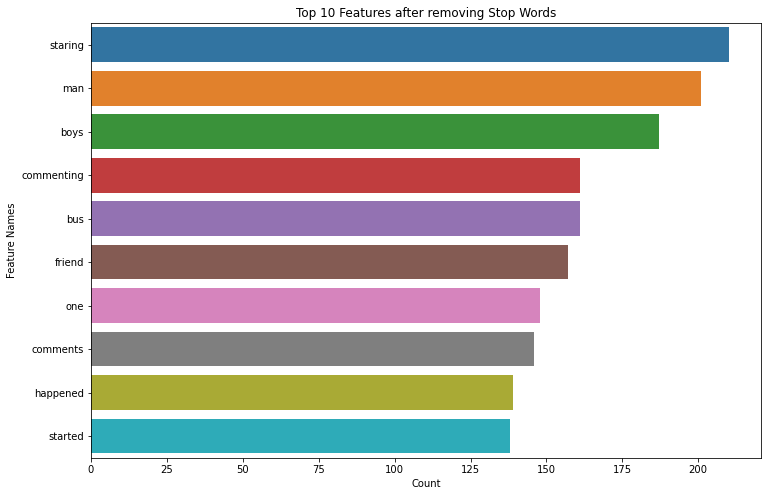

In [115]:
#non_ogling
vect=CountVectorizer(stop_words=set(stopwords.words('english')))#in the presence of stop words
output=vect.fit_transform(non_ogling)
features=vect.get_feature_names()#here we are getting the unique feature names
count=output.toarray().sum(axis=0)#here we are getting the count of unique words
df=pd.DataFrame(count,features)#Loading the feature and count to the DataFrame
df=df.sort_values(by=0,ascending=False)#Sorting the DataFrame to get the most occurances
df=df[:10]#Top 40 words with most word count

x=df.index#getting only the top 40 feature names
y=[df[0][i] for i in range(len(df))]#getting the count of top 40 feature names
plt.figure(figsize=(12,8))
sns.barplot(x=y,y=x)
plt.title('Top 10 Features after removing Stop Words')
plt.xlabel('Count')
plt.ylabel('Feature Names')
plt.show()

**Observations:**
    
Similar to that of the Top 40 features that we analysed before here we are analysing the Top 40 features for each category
for each commenting data, groping data and ogling data and visualizing it through barplot.

In [116]:
from nltk.corpus import stopwords
vect=TfidfVectorizer(stop_words=set(stopwords.words('english')))
output=vect.fit_transform(commenting_df['Description'])
features=vect.get_feature_names()
idf_values=vect.idf_
df=pd.DataFrame(idf_values,features)
df=df.sort_values(by=0,ascending=False)
df=df[:40]
df

,0
spilt,9.188967
rebelled,9.188967
societal,9.188967
goapune,9.188967
societies,9.188967
societys,9.188967
gnr,9.188967
glimpse,9.188967
sociocultural,9.188967
reference,9.188967


**Observation:**

These are some of the rare words used in the whole text, which is obtained by taking the idf values and sorting them in the
descending order of the idf values.

In [117]:
#Sentimental Analysis
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sid = SentimentIntensityAnalyzer()

import numpy as np
def sentiment_score(X,feature):
    count,count1,count2=0,0,0
    for i in range(len(X)):
        for_sentiment=X[feature].iloc[i]#getting the corresponding sentence based on the index values
        ss=sid.polarity_scores(for_sentiment)#doing sentimental Analysis for each sentence
        lst=list(ss.values())#storing the sentinmental values for each sentence in a list
        maximum=np.argsort(lst)[-2]#getting the position of the highest score
        if maximum==0:
            count+=1
        elif maximum==1:
            count1+=1
        else:
            count2+=1
    return count,count1,count2#returning the negative_count,neutral_count,positive_count

In [118]:
negative_count,neutral_count,positive_count=sentiment_score(commenting_df,'Description')

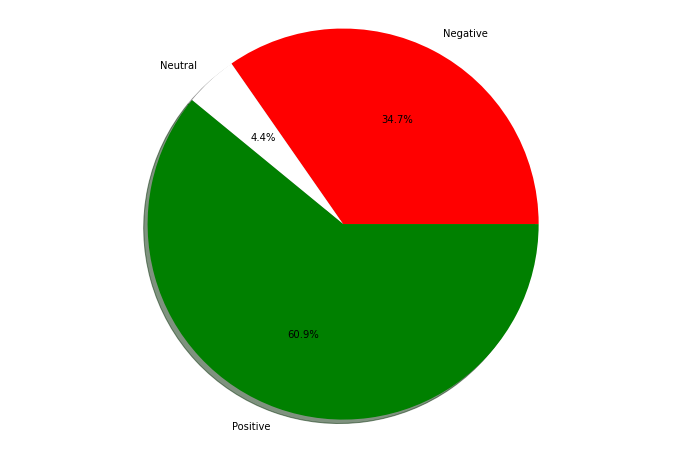

In [119]:
#pie plot of count of maximamal sentimental score of each sentence
plt.figure(figsize=(12,8))
plt.pie([negative_count,neutral_count,positive_count],labels=['Negative','Neutral','Positive'],shadow=True,autopct='%1.1f%%',\
        colors=['red','white','green'])
plt.axis('equal')
plt.show()

## Multilabel Classification:

In [120]:
df_train=pd.read_csv('train.csv')#loading the train.csv in the Dataframe 
df_train.head()

,Description,Commenting,Ogling/Facial Expressions/Staring,Touching /Groping
0,"Was walking along crowded street, holding mums...",0,0,1
1,This incident took place in the evening.I was ...,0,1,0
2,I WAS WAITING FOR THE BUS. A MAN CAME ON A BIK...,1,0,0
3,Incident happened inside the train,0,0,0
4,I witnessed an incident when a chain was bruta...,0,0,0


In [121]:
df_train.columns=['Description','commenting','ogling','groping']#renaming column names
df_train.head()

,Description,commenting,ogling,groping
0,"Was walking along crowded street, holding mums...",0,0,1
1,This incident took place in the evening.I was ...,0,1,0
2,I WAS WAITING FOR THE BUS. A MAN CAME ON A BIK...,1,0,0
3,Incident happened inside the train,0,0,0
4,I witnessed an incident when a chain was bruta...,0,0,0


In [122]:
df_train.iloc[:,1:].sum()#getting the columns except description and counting the values for each category

commenting    2820
ogling        1526
groping       2166
dtype: int64

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


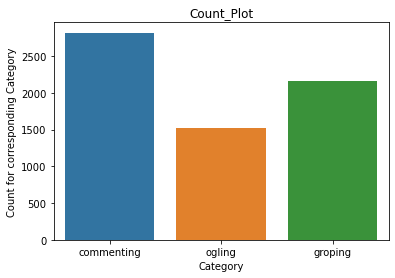

In [123]:
#Count plot for each category
sns.barplot(df_train.columns[1:].values,df_train.iloc[:,1:].sum().values)
plt.title("Count_Plot")
plt.xlabel("Category")
plt.ylabel("Count for corresponding Category")
plt.show()

**Observation:**

From this plot we can see the corresponding count for each category.

***commenting-->2820***

***ogling    -->1526***

***groping   -->2166***

In [124]:
df_train.iloc[:,1:].sum(1).value_counts()#counting no of text points having multilabels

1    3627
0    2253
2    1078
3     243
dtype: int64

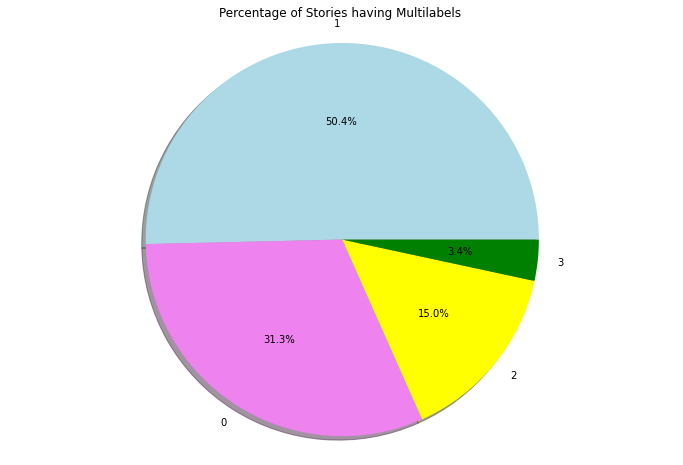

In [125]:
#plotting percentage of stories having Multilabels
values=df_train.iloc[:,1:].sum(1).value_counts()
plt.figure(figsize=(12,8))
plt.pie(values,labels=['1','0','2','3'],shadow=True,autopct='%1.1f%%',\
        colors=['lightblue','violet','yellow','green'])
plt.axis('equal')
plt.title('Percentage of Stories having Multilabels ')
plt.show()

**Observation:**

This plot gives the visual representation of the no of text data points which has multilabels in the dataset.

-->2253 points have no labels which clearly depicts that the story does not correpond to any Sexual Harassment Activity.

-->3627 points corresponds to any one of Category which may be commenting or groping or ogling.

-->1078 points corresponds to any of two Category which may be (commenting and groping) or (commenting and ogling) or (ogling and groping).

-->243 points corresponds to all the three Category such as commenting,ogling and groping.

# Preprocessing

## Single Label Binary Classification:

In [126]:
commenting_df.info()#info about the data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7201 entries, 0 to 7200
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Description  7201 non-null   object
 1   Category     7201 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 112.6+ KB


In [127]:
groping_df.info()#info about the data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7201 entries, 0 to 7200
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Description  7201 non-null   object
 1   Category     7201 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 112.6+ KB


In [128]:
ogling_df.info()#info about the data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7201 entries, 0 to 7200
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Description  7201 non-null   object
 1   Category     7201 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 112.6+ KB


In [129]:
#Displaying some random text data points for analysing before preprocessing on that.
print(commenting_df['Description'][0])
print("-"*125)
print(commenting_df['Description'][100])
print("-"*125)
print(commenting_df['Description'][600])
print("-"*125)
print(commenting_df['Description'][1000])
print("-"*125)

#after visualizing that we can see that just basic preprocessing is enough.

Was walking along crowded street, holding mums hand, when an elderly man groped butt, I turned to look at h7m and he looked away, and did it again after a while.I was 12 yrs old then.
-----------------------------------------------------------------------------------------------------------------------------
I was at the tap when a boy came to pour water.  He found a 14 years old girl waiting  to fetch water and just grabbed her hands and dragged her away.
-----------------------------------------------------------------------------------------------------------------------------
A friend of mine who lives beside our house is usaully harassed.When she is going out to read, a man by name John, always harass her because he has an advantage over her but she did not like the idea.
-----------------------------------------------------------------------------------------------------------------------------
taking pictures and commenting rude behaviour ,catcalls
------------------------------

In [130]:
# https://gist.github.com/sebleier/554280
# we are removing the words from the stop words list: 'no', 'nor', 'not'
stopwords= ['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've",\
            "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', \
            'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their',\
            'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', \
            'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', \
            'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', \
            'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after',\
            'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further',\
            'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more',\
            'most', 'other', 'some', 'such', 'only', 'own', 'same', 'so', 'than', 'too', 'very', \
            's', 't', 'can', 'will', 'just', 'don', "don't", 'should', "should've", 'now', 'd', 'll', 'm', 'o', 're', \
            've', 'y', 'ain', 'aren', "aren't", 'couldn', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn',\
            "hadn't", 'hasn', "hasn't", 'haven', "haven't", 'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn',\
            "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn', "wasn't", 'weren', "weren't", \
            'won', "won't", 'wouldn', "wouldn't"]

In [131]:
lemmatizer=WordNetLemmatizer()
def preprocessing(text_data):
    text = re.sub('[^A-Za-z0-9]+', ' ', text_data)#replacing characters other than alphabets and numbers with space
    text = ' '.join([word.lower() for word in text.split()])#lowering all the words
    text = [word for word in text.split() if word not in stopwords]#removing the stopwords
    text = ' '.join([lemmatizer.lemmatize(word) for word in text])#lemmatizing the words
    return text

In [132]:
commenting_df['cleaned_text']=commenting_df['Description'].apply(preprocessing)
commenting_df

,Description,Category,cleaned_text
0,"Was walking along crowded street, holding mums...",0,walking along crowded street holding mum hand ...
1,This incident took place in the evening.I was ...,0,incident took place evening metro two guy star...
2,I WAS WAITING FOR THE BUS. A MAN CAME ON A BIK...,1,waiting bus man came bike offering liftvto you...
3,Incident happened inside the train,0,incident happened inside train
4,I witnessed an incident when a chain was bruta...,0,witnessed incident chain brutally snatched eld...
...,...,...,...
7196,There was this person near a construction site...,0,person near construction site probably laborer...
7197,He threatened me by making inappropriate conve...,1,threatened making inappropriate conversation t...
7198,happened during morning at university metro st...,1,happened morning university metro station guy ...
7199,one day my aunt was returniec frm office .. sh...,0,one day aunt returniec frm office shaunt e fou...


In [133]:
groping_df['cleaned_text']=groping_df['Description'].apply(preprocessing)
groping_df

,Description,Category,cleaned_text
0,"Was walking along crowded street, holding mums...",1,walking along crowded street holding mum hand ...
1,This incident took place in the evening.I was ...,0,incident took place evening metro two guy star...
2,I WAS WAITING FOR THE BUS. A MAN CAME ON A BIK...,0,waiting bus man came bike offering liftvto you...
3,Incident happened inside the train,0,incident happened inside train
4,I witnessed an incident when a chain was bruta...,0,witnessed incident chain brutally snatched eld...
...,...,...,...
7196,There was this person near a construction site...,0,person near construction site probably laborer...
7197,He threatened me by making inappropriate conve...,0,threatened making inappropriate conversation t...
7198,happened during morning at university metro st...,0,happened morning university metro station guy ...
7199,one day my aunt was returniec frm office .. sh...,0,one day aunt returniec frm office shaunt e fou...


In [134]:
ogling_df['cleaned_text']=ogling_df['Description'].apply(preprocessing)
ogling_df

,Description,Category,cleaned_text
0,"Was walking along crowded street, holding mums...",0,walking along crowded street holding mum hand ...
1,This incident took place in the evening.I was ...,1,incident took place evening metro two guy star...
2,I WAS WAITING FOR THE BUS. A MAN CAME ON A BIK...,0,waiting bus man came bike offering liftvto you...
3,Incident happened inside the train,0,incident happened inside train
4,I witnessed an incident when a chain was bruta...,0,witnessed incident chain brutally snatched eld...
...,...,...,...
7196,There was this person near a construction site...,1,person near construction site probably laborer...
7197,He threatened me by making inappropriate conve...,0,threatened making inappropriate conversation t...
7198,happened during morning at university metro st...,0,happened morning university metro station guy ...
7199,one day my aunt was returniec frm office .. sh...,0,one day aunt returniec frm office shaunt e fou...


In [135]:
#after preprocessing displaying a random data point
print(commenting_df['Description'][2435])
print("-"*125)
print(commenting_df['Description'][145])
print("-"*125)
print(commenting_df['Description'][455])
print("-"*125)
print(commenting_df['Description'][5660])
print("-"*125)

This incident took place on 21st March 2013 around 6pm.Two guys on a bike were following a girl and were passing comments on her.
-----------------------------------------------------------------------------------------------------------------------------
Harassment by boys who comment, take pictures and whistle
-----------------------------------------------------------------------------------------------------------------------------
it was on Saturday when I was going to the shop and I heard someone whistling at me when I turned to see who it was I saw another boy coming towards me and I pretended not to have seen him and walked away
-----------------------------------------------------------------------------------------------------------------------------
it was really bad.
-----------------------------------------------------------------------------------------------------------------------------


## MultiLabel Classification:

In [136]:
df_train.info()#info about the data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7201 entries, 0 to 7200
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Description  7201 non-null   object
 1   commenting   7201 non-null   int64 
 2   ogling       7201 non-null   int64 
 3   groping      7201 non-null   int64 
dtypes: int64(3), object(1)
memory usage: 225.2+ KB


In [138]:
df_train['cleaned_text']=df_train['Description'].apply(preprocessing)
df_train

,Description,commenting,ogling,groping,cleaned_text
0,"Was walking along crowded street, holding mums...",0,0,1,walking along crowded street holding mum hand ...
1,This incident took place in the evening.I was ...,0,1,0,incident took place evening metro two guy star...
2,I WAS WAITING FOR THE BUS. A MAN CAME ON A BIK...,1,0,0,waiting bus man came bike offering liftvto you...
3,Incident happened inside the train,0,0,0,incident happened inside train
4,I witnessed an incident when a chain was bruta...,0,0,0,witnessed incident chain brutally snatched eld...
...,...,...,...,...,...
7196,There was this person near a construction site...,0,1,0,person near construction site probably laborer...
7197,He threatened me by making inappropriate conve...,1,0,0,threatened making inappropriate conversation t...
7198,happened during morning at university metro st...,1,0,0,happened morning university metro station guy ...
7199,one day my aunt was returniec frm office .. sh...,0,0,0,one day aunt returniec frm office shaunt e fou...


In [139]:
#Preprocessing of Validation and Test datasets.

In [140]:
commenting_df_val=pd.read_csv('commenting_data_val.csv')
commenting_df_test=pd.read_csv('commenting_data_test.csv')
groping_df_val=pd.read_csv('groping_data_val.csv')
groping_df_test=pd.read_csv('groping_data_test.csv')
ogling_df_val=pd.read_csv('ogling_data_test.csv')
ogling_df_test=pd.read_csv('ogling_data_test.csv')

In [141]:
commenting_df_val['cleaned_text']=commenting_df_val['Description'].apply(preprocessing)
commenting_df_test['cleaned_text']=commenting_df_test['Description'].apply(preprocessing)
groping_df_val['cleaned_text']=groping_df_val['Description'].apply(preprocessing)
groping_df_test['cleaned_text']=groping_df_test['Description'].apply(preprocessing)
ogling_df_val['cleaned_text']=ogling_df_val['Description'].apply(preprocessing)
ogling_df_test['cleaned_text']=ogling_df_test['Description'].apply(preprocessing)

In [142]:
df_val=pd.read_csv('dev.csv')
df_test=pd.read_csv('test.csv')

In [143]:
df_val.columns=['Description','commenting','ogling','groping']#renaming column names
df_test.columns=['Description','commenting','ogling','groping']#renaming column names

In [144]:
df_val['cleaned_text']=df_val['Description'].apply(preprocessing)
df_test['cleaned_text']=df_test['Description'].apply(preprocessing)

In [145]:
df_train.to_csv('preprocessed_data_train.csv')
df_val.to_csv('preprocessed_data_val.csv')
df_test.to_csv('preprocessed_data_test.csv')
commenting_df.to_csv('train_commenting_data.csv')
groping_df.to_csv('train_groping_data.csv')
ogling_df.to_csv('train_ogling_data.csv')

In [146]:
commenting_df_val.to_csv('val_commenting_data.csv')
groping_df_val.to_csv('val_groping_data.csv')
ogling_df_val.to_csv('val_ogling_data.csv')
commenting_df_test.to_csv('test_commenting_data.csv')
groping_df_test.to_csv('test_groping_data.csv')
ogling_df_test.to_csv('test_ogling_data.csv')